In [2]:
Dutch = 'https://www.gutenberg.org/cache/epub/39181/pg39181-images.html'
English = "https://www.gutenberg.org/cache/epub/1004/pg1004-images.html"
Finnish = "https://www.gutenberg.org/cache/epub/12546/pg12546.html"
German = "https://www.gutenberg.org/cache/epub/8085/pg8085.html"
Italian = "https://www.gutenberg.org/cache/epub/1000/pg1000-images.html"
Spanish = "https://www.gutenberg.org/cache/epub/57303/pg57303-images.html"

languages = [Dutch, German, Italian, English, Spanish, Finnish]
names = ['Dutch', 'German', 'Italian', 'English', 'Spanish', 'Finnish']

In [3]:
import gensim
from gensim.models import word2vec
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim.downloader as api
import numpy as np
from urllib.request import urlopen
import re
from nltk.corpus import stopwords
import pandas as pd
from nameof import nameof

In [75]:
def data_tokenizer(url, language, encoding = 'utf-8'):
    with urlopen(url) as file:
        divine_comedy = file.read().decode(encoding)

    f = divine_comedy.replace("\n", " ")    
    f = re.sub(r'[^\w\s]', '', f)
    data = []
    for i in sent_tokenize(f):
        temp = []
     
    # tokenize the sentence into words
        for j in word_tokenize(i):
            temp.append(j.lower())
 
        data.append(temp)
    return data

In [76]:
var_holder = {}
for i in languages:
     langname = names[languages.index(i)]
     var_holder['tokenized_' + langname]= data_tokenizer(i, langname)

locals().update(var_holder)

In [77]:
tokenized_names = 'tokenized_'+pd.Series(names)
tokenized_languages = [tokenized_Dutch, tokenized_German, tokenized_Italian, tokenized_English, tokenized_Spanish, tokenized_Finnish]


In [ ]:
def stopwords_remover(data, language):    
    stop_words = set(stopwords.words(language))
    stopped = [[i for i in j if i not in stop_words] for j in data]
    return stopped

In [95]:
def intro_remove()
index_start = tokenized_Dutch[0].index('start')
if tokenized_Dutch[0][index_start:index_start+6] == ['start', 'of', 'the', 'project', 'gutenberg', 'ebook']:
    tokenized_Dutch = tokenized_Dutch[index_start+6:]

In [7]:
for tk in tokenized_languages:
    print(tokenized_names[tokenized_languages.index(tk)],": ", tk[0][3000:3010])

tokenized_Dutch :  ['reis', 'zeide', 'zoo', 'groot', 'tijdsverloop', 'ontnomenp', 'p', 'classp2a', 'classregel', 'idii_9494a']
tokenized_German :  ['wer', 'meister', 'her', 'hinbr', 'sturmwind', 'treibt', 'ruhe', 'lechzenbr', 'ichund', 'zuges']
tokenized_Italian :  ['dio', 'teme', 'p', 'p', 'caron', 'dimonio', 'occhi', 'bragiabr', 'accennando', 'tutte']
tokenized_English :  ['p', 'p', 'classnoindent', 'entreaty', 'besought', 'luciabr', 'said', 'thy', 'faithful', 'one']
tokenized_Spanish :  ['venga', 'lebrela', 'classfnanchor', 'pginternal', 'hreffootnote_1', 'idfnanchor_11a', 'haga', 'morir', 'dolores', 'alimentará']
tokenized_Finnish :  ['metsää', 'tarkoitan', 'metsää', 'monen', 'vaisun', 'vainaanp', 'p', 'idid00180uneni', 'jälkeen', 'pitkä']


In [8]:
for tk in tokenized_languages:
    print(len(tk[0]))

44471
57427
71994
74499
71623
90944


In [9]:
def skipgram(language):
    return gensim.models.Word2Vec(language, min_count = 1,
                              vector_size = 100,sg = 1).wv
def cbow(language):
    return gensim.models.Word2Vec(language, min_count = 1,
                              vector_size = 100, sg = 0).wv

In [10]:
skipgram_English = skipgram(tokenized_English)
cbow_English = cbow(tokenized_English)
skipgram_Dutch = skipgram(tokenized_Dutch)
cbow_Dutch = cbow(tokenized_Dutch)
skipgram_German = skipgram(tokenized_German)
cbow_German = cbow(tokenized_German)
skipgram_Italian = skipgram(tokenized_Italian)
cbow_Italian = cbow(tokenized_Italian)
skipgram_Spanish = skipgram(tokenized_Spanish)
cbow_Spanish = cbow(tokenized_Spanish)
skipgram_Finnish = skipgram(tokenized_Finnish)
cbow_Finnish = cbow(tokenized_Finnish)
 

In [11]:
cbow = [cbow_Dutch, cbow_German, cbow_Italian, cbow_English, cbow_Spanish, cbow_Finnish]
cbow_names = 'cbow_'+pd.Series(names)
skipgram = [skipgram_Dutch, skipgram_German, skipgram_Italian, skipgram_English, skipgram_Spanish, skipgram_Finnish]
skipgram_names = 'skipgram_'+pd.Series(names)

In [12]:
print(skipgram_English.index_to_key[:10])
print(cbow_English.index_to_key[:10])

['p', 'classnoindent', 'thou', 'one', 'unto', 'upon', 'thee', 'thy', 'said', 'us']
['p', 'classnoindent', 'thou', 'one', 'unto', 'upon', 'thee', 'thy', 'said', 'us']


In [13]:
print(skipgram_Dutch.index_to_key[:10])
print(cbow_Dutch.index_to_key[:10])

['p', 'classregel', 'classp2a', 'den', 'classp3a', 'a', 'pginternal', 'classnoot', 'gij', 'div']
['p', 'classregel', 'classp2a', 'den', 'classp3a', 'a', 'pginternal', 'classnoot', 'gij', 'div']


In [14]:
print(skipgram_German.index_to_key[:10])
print(cbow_German.index_to_key[:10])

['p', 'sprach', 'sah', 'drum', 'the', 'wohl', 'schon', 'mehr', 'gleich', 'wer']
['p', 'sprach', 'sah', 'drum', 'the', 'wohl', 'schon', 'mehr', 'gleich', 'wer']


In [15]:
print(skipgram_Italian.index_to_key[:10])
print(cbow_Italian.index_to_key[:10])

['p', 'sì', 'de', 'quel', 'me', 'così', 'poi', 'là', 'quando', 'già']
['p', 'sì', 'de', 'quel', 'me', 'così', 'poi', 'là', 'quando', 'già']


In [16]:
print(skipgram_Spanish.index_to_key[:10])
print(cbow_Spanish.index_to_key[:10])

['si', 'div', 'classpagenuma', 'tan', 'hacia', 'aquel', 'así', 'pues', 'pa', 'modo']
['si', 'div', 'classpagenuma', 'tan', 'hacia', 'aquel', 'así', 'pues', 'pa', 'modo']


In [17]:
print(skipgram_Finnish.index_to_key[:10])
print(cbow_Finnish.index_to_key[:10])

['p', 'mi', 'ma', 'näin', 'stylemargintop', 'sa', 'jo', 'mun', 'kaikki', 'mut']
['p', 'mi', 'ma', 'näin', 'stylemargintop', 'sa', 'jo', 'mun', 'kaikki', 'mut']


In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def flat(model):
    vocab = list(model.index_to_key[:50])
    vectors = model[vocab]
    vectors_flatten = vectors.flatten()
    return vectors_flatten

In [19]:
for i in skipgram:
    langname = names[skipgram.index(i)]
    var_holder['flat_skipgram_' + langname]= flat(i)

locals().update(var_holder)
flat_skipgram_names = 'flat_skipgram_'+pd.Series(names)

In [20]:
for i in cbow:
    langname = names[cbow.index(i)]
    var_holder['flat_cbow_' + langname]= flat(i)

locals().update(var_holder)
flat_cbow_names = 'flat_cbow_'+pd.Series(names)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
for_sim = pd.DataFrame([flat_skipgram_Dutch, flat_skipgram_German, flat_skipgram_Italian, flat_skipgram_English, flat_skipgram_Spanish, flat_skipgram_Finnish][:100])
for_sim = for_sim
for_sim.index = names
for_sim

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Dutch,-0.115721,0.183961,0.071087,-0.019361,-0.089533,-0.211027,-0.104716,0.076583,-0.411030,-0.043107,...,0.080370,0.043422,-0.113038,0.000737,0.206523,0.092469,0.136495,0.031415,-0.025561,0.005516
German,-0.027764,0.000609,0.031411,0.025868,-0.044930,-0.033440,0.020220,0.052475,-0.017139,-0.023023,...,0.007679,-0.006076,-0.007716,-0.009176,0.005004,0.008380,-0.000469,-0.000139,-0.008427,-0.005198
Italian,0.135024,0.410883,0.069294,-0.216265,0.300503,-0.029620,0.377152,0.253885,-0.021151,-0.070641,...,0.366454,0.086855,0.100396,-0.087413,0.127161,0.230365,0.142696,-0.194344,0.183619,-0.350963
English,0.106514,-0.015139,-0.150218,-0.280268,0.177183,-0.116375,0.036573,0.223316,0.508301,-0.316959,...,0.374547,-0.017156,0.255880,0.193207,0.368484,-0.046317,0.088925,0.074605,-0.184282,0.409247
Spanish,-0.014064,0.011040,0.009490,0.005390,-0.013066,-0.010537,0.006104,0.023186,-0.005687,-0.017105,...,0.008275,-0.002922,-0.002250,-0.007710,0.016812,0.019921,-0.004977,-0.011994,-0.015130,-0.013141
Finnish,0.062740,0.077043,0.022371,0.044030,-0.068907,-0.103104,0.080136,0.126934,-0.050521,-0.033574,...,0.011936,-0.007297,-0.007308,-0.007303,0.008031,0.007230,-0.005493,-0.002835,-0.005454,-0.004389


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(for_sim)
pd.DataFrame(sim).head()

,0,1,2,3,4,5
0,1.000000,0.266042,0.156846,0.028549,0.300559,0.214461
1,0.266042,0.999999,0.168757,0.136669,0.659825,0.629222
2,0.156846,0.168757,1.000000,0.017443,0.203959,0.187484
3,0.028549,0.136669,0.017443,1.000000,0.103695,0.118162
4,0.300559,0.659825,0.203959,0.103695,1.000001,0.569593


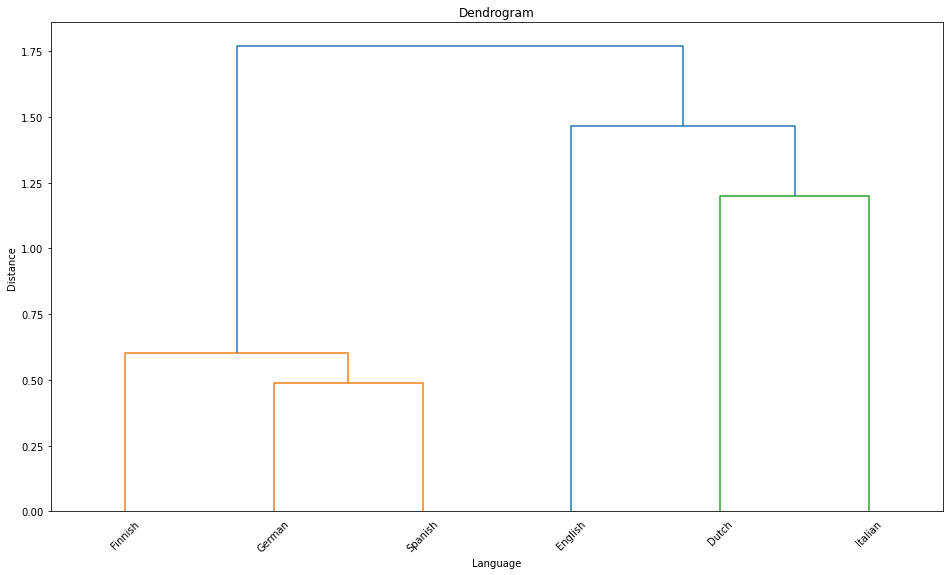

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(sim, 'ward')
plt.figure(figsize=(16, 9))
labels = for_sim.columns
dendrogram(Z, leaf_rotation=90, leaf_font_size=7., labels = names)
plt.title('Dendrogram')
plt.ylabel('Distance')
plt.xlabel('Language')
plt.xticks(rotation = 45, fontsize = 10)

plt.show()

In [30]:
for_sim_cbow = pd.DataFrame([flat_cbow_Dutch, flat_cbow_German, flat_cbow_Italian, flat_cbow_English, flat_cbow_Spanish, flat_cbow_Finnish][:100])
for_sim_cbow = for_sim_cbow
for_sim_cbow.index = names
for_sim_cbow


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Dutch,-0.016626,0.021122,0.002481,0.004788,-0.010994,-0.035885,0.006758,0.032249,-0.041434,-0.014864,...,0.010316,-0.002803,-0.008057,-0.008943,0.012370,0.010872,0.001511,-0.000109,-0.006594,-0.004117
German,-0.003194,0.000381,0.007629,0.009458,-0.012766,-0.009500,0.008167,0.012772,-0.006366,-0.006356,...,0.006468,-0.006619,-0.008377,-0.008963,0.003852,0.006488,-0.002025,0.001181,-0.008382,-0.005105
Italian,0.122517,0.466302,0.060224,-0.237329,0.271068,-0.053037,0.471703,0.258174,-0.073598,-0.128515,...,0.153742,0.040004,0.037679,-0.042043,0.069735,0.102705,0.034608,-0.063067,0.074820,-0.139500
English,0.044364,0.206458,-0.048066,-0.305315,0.238972,-0.235456,0.194075,0.482631,0.454968,-0.496094,...,0.196934,0.017900,0.147042,0.104976,0.184429,-0.033191,0.044486,0.063271,-0.135437,0.206780
Spanish,-0.001263,0.000892,0.005405,0.009017,-0.009939,-0.007593,0.006653,0.010401,-0.005275,-0.005017,...,0.006815,-0.006394,-0.008262,-0.008816,0.004940,0.007531,-0.002340,0.000205,-0.008587,-0.005560
Finnish,0.001114,0.007693,0.004881,0.011208,-0.013231,-0.012826,0.012568,0.021033,-0.009156,-0.009697,...,0.007142,-0.006763,-0.008465,-0.008237,0.004409,0.006432,-0.002292,0.000854,-0.007881,-0.005001


In [31]:
sim_cbow = cosine_similarity(for_sim_cbow)
pd.DataFrame(sim_cbow).head()


,0,1,2,3,4,5
0,1.000002,0.768817,0.238509,0.189627,0.774544,0.784986
1,0.768817,0.999998,0.158409,0.161962,0.992696,0.988644
2,0.238509,0.158409,1.000002,0.104144,0.166504,0.180107
3,0.189627,0.161962,0.104144,1.000000,0.161916,0.182724
4,0.774544,0.992696,0.166504,0.161916,0.999999,0.987666


Text(0, 0.5, 'Distance')

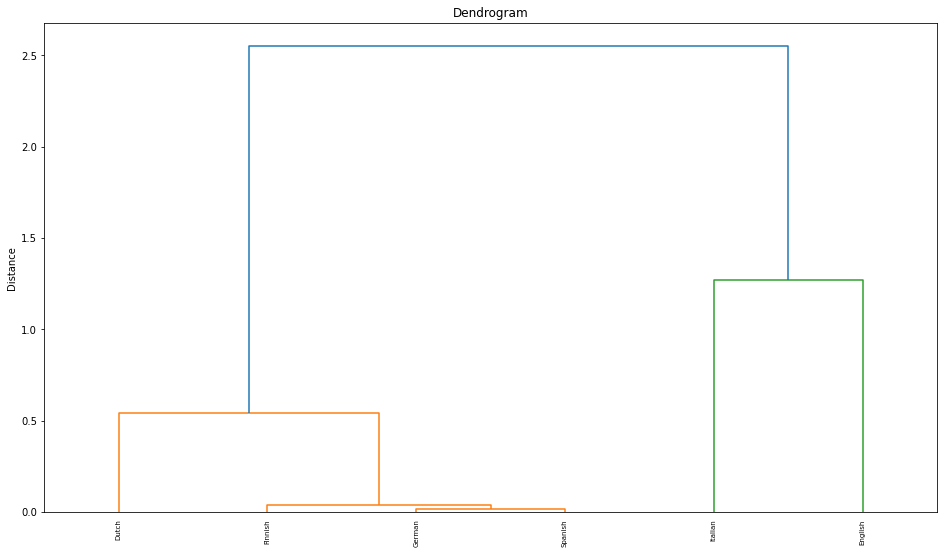

In [32]:
Z_cbow = linkage(sim_cbow, 'ward')
plt.figure(figsize=(16, 9))
labels = for_sim_cbow.columns
dendrogram(Z_cbow, leaf_rotation=90, leaf_font_size=7., labels = names)
plt.title('Dendrogram')
plt.ylabel('Distance')
